## Import Libraries

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import os
import warnings

# Create a directory for saving the plots
if not os.path.exists('eda_plots'):
    os.makedirs('eda_plots')

# Set plot style and figure size
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("Set2")
sns.set_context("talk")
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


# 1. DATA LOADING AND INSPECTION

In this section, we'll load the dataset and perform initial inspection to understand its structure, data types, and quality.

In [7]:
# Load the dataset
print("Loading dataset...")
try:
    df = pd.read_csv('data/employee_data.csv')
    print(f"Dataset loaded successfully: {df.shape[0]} rows and {df.shape[1]} columns\n")
except Exception as e:
    print(f"Error loading dataset: {e}")

Loading dataset...
Dataset loaded successfully: 10000 rows and 10 columns



In [8]:
# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


In [9]:
# Data types and basic information
print("Data types and basic information:")
df.info()

Data types and basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   gender           10000 non-null  object 
 3   marital_status   10000 non-null  object 
 4   salary           10000 non-null  float64
 5   employment_type  10000 non-null  object 
 6   region           10000 non-null  object 
 7   has_dependents   10000 non-null  object 
 8   tenure_years     10000 non-null  float64
 9   enrolled         10000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


In [10]:
# Summary statistics for numerical features
print("Summary statistics for numerical features:")
df.describe()

Summary statistics for numerical features:


,employee_id,age,salary,tenure_years,enrolled
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000
mean,15000.50000,43.0020,65032.967907,3.967720,0.617400
std,2886.89568,12.2858,14923.958446,3.895488,0.486046
min,10001.00000,22.0000,2207.790000,0.000000,0.000000
25%,12500.75000,33.0000,54714.342500,1.200000,0.000000
50%,15000.50000,43.0000,65056.050000,2.800000,1.000000
75%,17500.25000,54.0000,75053.687500,5.600000,1.000000
max,20000.00000,64.0000,120312.000000,36.000000,1.000000


In [11]:
# Summary statistics for categorical features
print("Summary statistics for categorical features:")
df.describe(include=['object'])

Summary statistics for categorical features:


,gender,marital_status,employment_type,region,has_dependents
count,10000,10000,10000,10000,10000
unique,3,4,3,4,2
top,Male,Married,Full-time,West,Yes
freq,4815,4589,7041,2582,5993


In [12]:
# Check for missing values
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100

print("Missing values check:")
if missing_values.sum() > 0:
    pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_pct
    }).sort_values('Missing Values', ascending=False)
else:
    print("No missing values found in the dataset")

Missing values check:
No missing values found in the dataset


In [13]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [14]:
# Save cleaned dataset information to a report file
with open('eda_plots/data_summary.txt', 'w') as f:
    f.write(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns\n\n")
    f.write("Data Types:\n")
    for col in df.columns:
        f.write(f"{col}: {df[col].dtype}\n")
    
    f.write("\nMissing Values:\n")
    if missing_values.sum() > 0:
        for col in df.columns:
            if missing_values[col] > 0:
                f.write(f"{col}: {missing_values[col]} ({missing_pct[col]:.2f}%)\n")
    else:
        f.write("No missing values found\n")
    
    f.write(f"\nDuplicate Rows: {duplicate_count}\n")

print("Data summary saved to 'eda_plots/data_summary.txt'")

Data summary saved to 'eda_plots/data_summary.txt'


# 2. EXPLORATORY DATA ANALYSIS

Now that we understand the basic structure of our data, let's explore it more deeply with visualizations and statistical analysis.

## 2.1 Target Variable Analysis

First, let's examine the distribution of our target variable (enrolled).

In [15]:
# Calculate enrollment rate
enrollment_counts = df['enrolled'].value_counts()
enrollment_rate = (enrollment_counts[1] / len(df)) * 100

print(f"Enrollment distribution:")
print(f"- Enrolled (1): {enrollment_counts[1]} ({enrollment_rate:.2f}%)")
print(f"- Not Enrolled (0): {enrollment_counts[0]} ({100-enrollment_rate:.2f}%)")

Enrollment distribution:
- Enrolled (1): 6174 (61.74%)
- Not Enrolled (0): 3826 (38.26%)


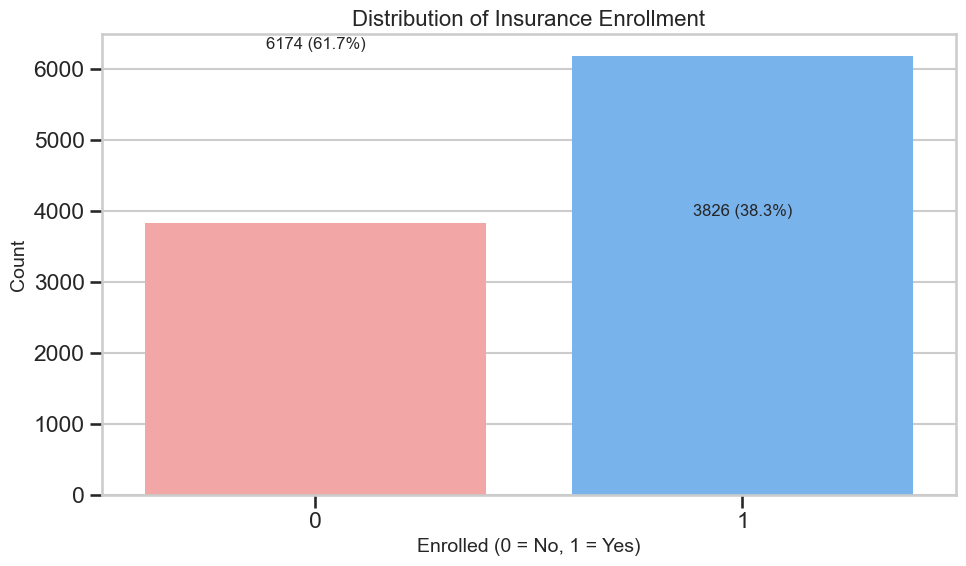

In [16]:
# Visualize target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='enrolled', data=df, palette=['#ff9999', '#66b3ff'])
plt.title('Distribution of Insurance Enrollment', fontsize=16)
plt.xlabel('Enrolled (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count and percentage labels
for i, count in enumerate(enrollment_counts):
    percentage = count / len(df) * 100
    ax.text(i, count + 100, f'{count} ({percentage:.1f}%)', 
            ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('eda_plots/target_distribution.png')
plt.show()

## 2.2 Numerical Features Analysis

Let's examine the numerical features in the dataset and their relationship with the target variable.

In [17]:
numerical_cols = ['age', 'salary', 'tenure_years']

# Create a report file for numerical features
with open('eda_plots/numerical_features_summary.txt', 'w') as f:
    f.write("NUMERICAL FEATURES SUMMARY\n")
    f.write("=========================\n\n")

    for col in numerical_cols:
        # Calculate statistics
        stats_dict = {
            'Min': df[col].min(),
            'Max': df[col].max(),
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Std Dev': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurtosis()
        }
        
        # Write to report
        f.write(f"{col.upper()}\n")
        f.write(f"{'-' * len(col)}\n")
        for stat_name, stat_value in stats_dict.items():
            f.write(f"{stat_name}: {stat_value:.2f}\n")
        
        # Compare statistics by target
        f.write("\nBy Enrollment Status:\n")
        enrolled_mean = df[df['enrolled'] == 1][col].mean()
        not_enrolled_mean = df[df['enrolled'] == 0][col].mean()
        f.write(f"Mean for enrolled: {enrolled_mean:.2f}\n")
        f.write(f"Mean for not enrolled: {not_enrolled_mean:.2f}\n")
        f.write(f"Difference: {enrolled_mean - not_enrolled_mean:.2f}\n")
        
        # T-test
        t_stat, p_val = stats.ttest_ind(
            df[df['enrolled'] == 1][col],
            df[df['enrolled'] == 0][col],
            equal_var=False
        )
        f.write(f"T-test p-value: {p_val:.5f}\n")
        f.write(f"Statistical significance: {'Yes' if p_val < 0.05 else 'No'}\n\n")
        
        # Print basic stats to console
        print(f"\n{col.upper()}")
        print(f"Range: {stats_dict['Min']:.2f} to {stats_dict['Max']:.2f}")
        print(f"Mean: {stats_dict['Mean']:.2f}")
        print(f"Mean difference (enrolled vs. not): {enrolled_mean - not_enrolled_mean:.2f}")
        print(f"Statistically significant: {'Yes' if p_val < 0.05 else 'No'}")

print("\nNumerical features summary saved to 'eda_plots/numerical_features_summary.txt'")


AGE
Range: 22.00 to 64.00
Mean: 43.00
Mean difference (enrolled vs. not): 6.79
Statistically significant: Yes

SALARY
Range: 2207.79 to 120312.00
Mean: 65032.97
Mean difference (enrolled vs. not): 11250.33
Statistically significant: Yes

TENURE_YEARS
Range: 0.00 to 36.00
Mean: 3.97
Mean difference (enrolled vs. not): -0.06
Statistically significant: No

Numerical features summary saved to 'eda_plots/numerical_features_summary.txt'


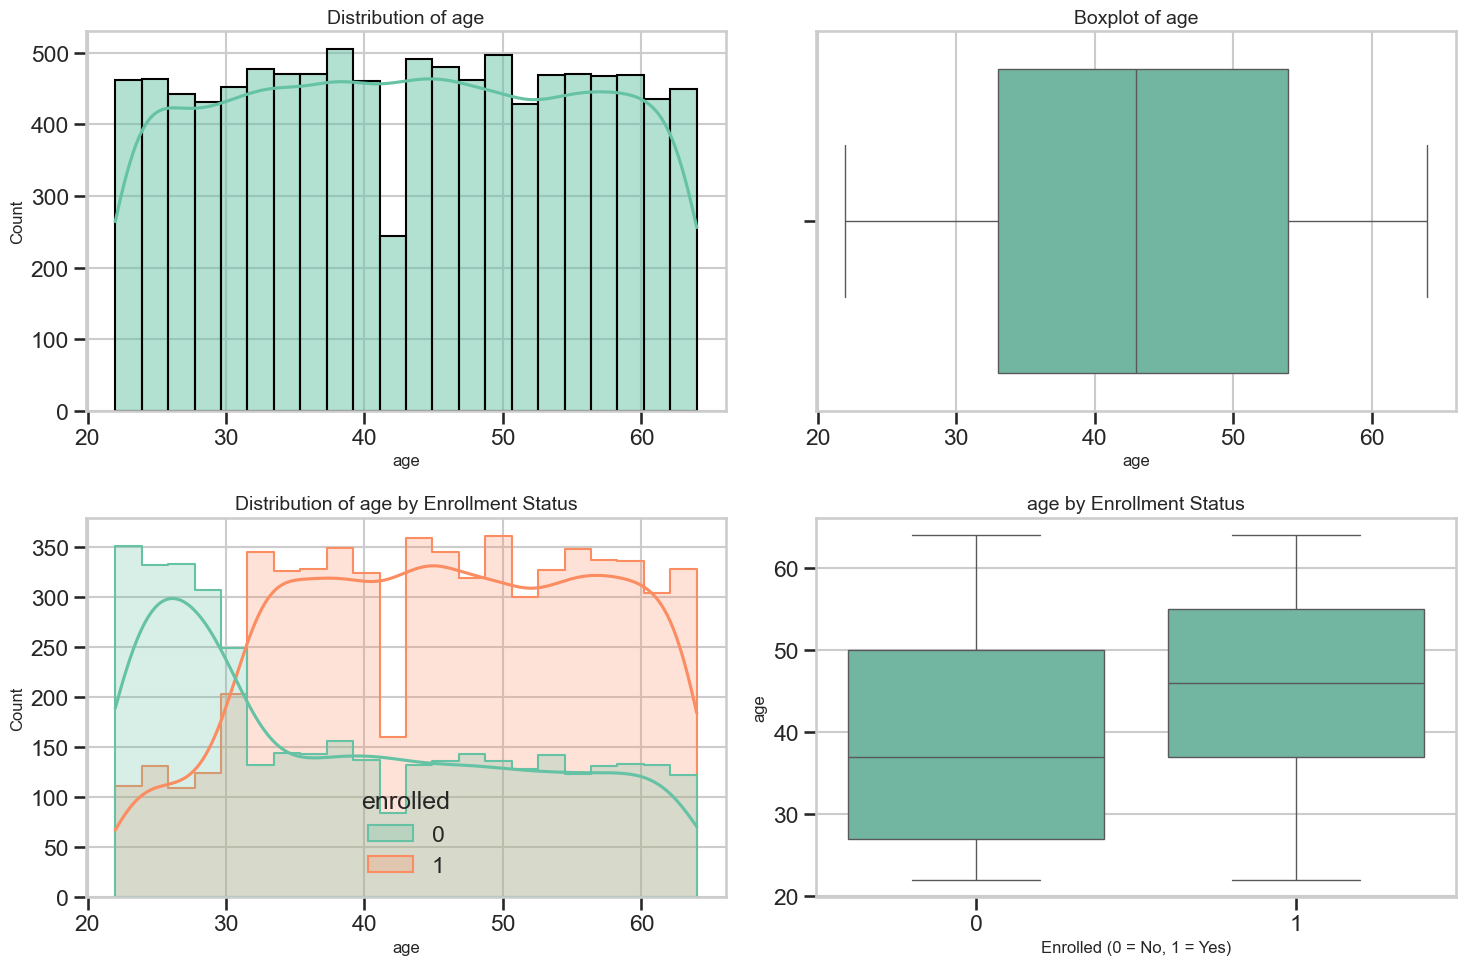

Analysis plots for age saved to 'eda_plots/age_analysis.png'


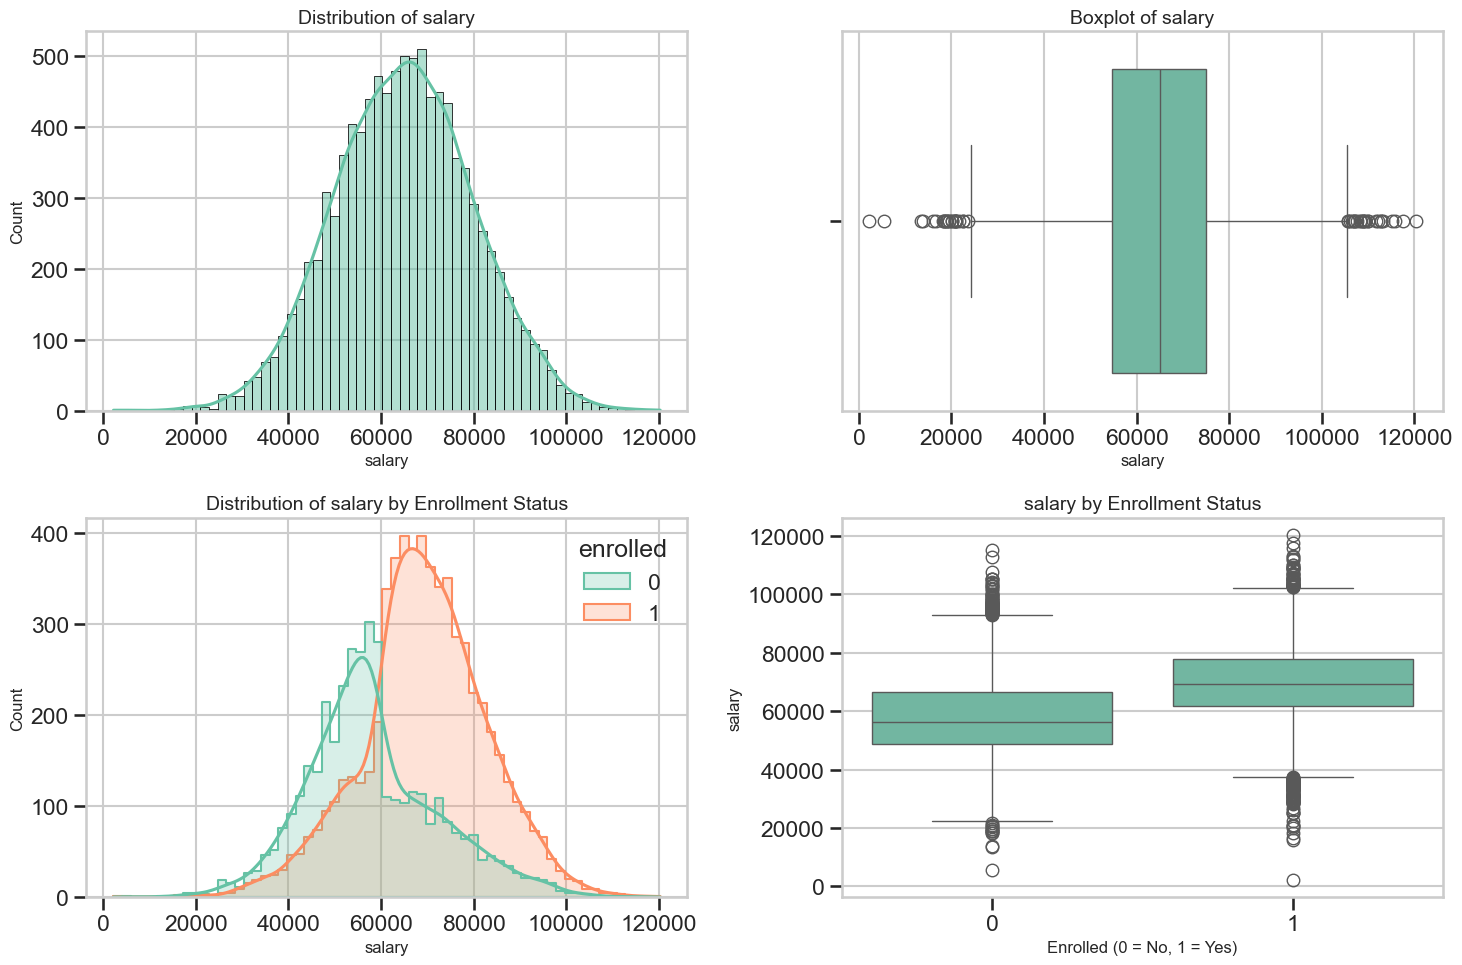

Analysis plots for salary saved to 'eda_plots/salary_analysis.png'


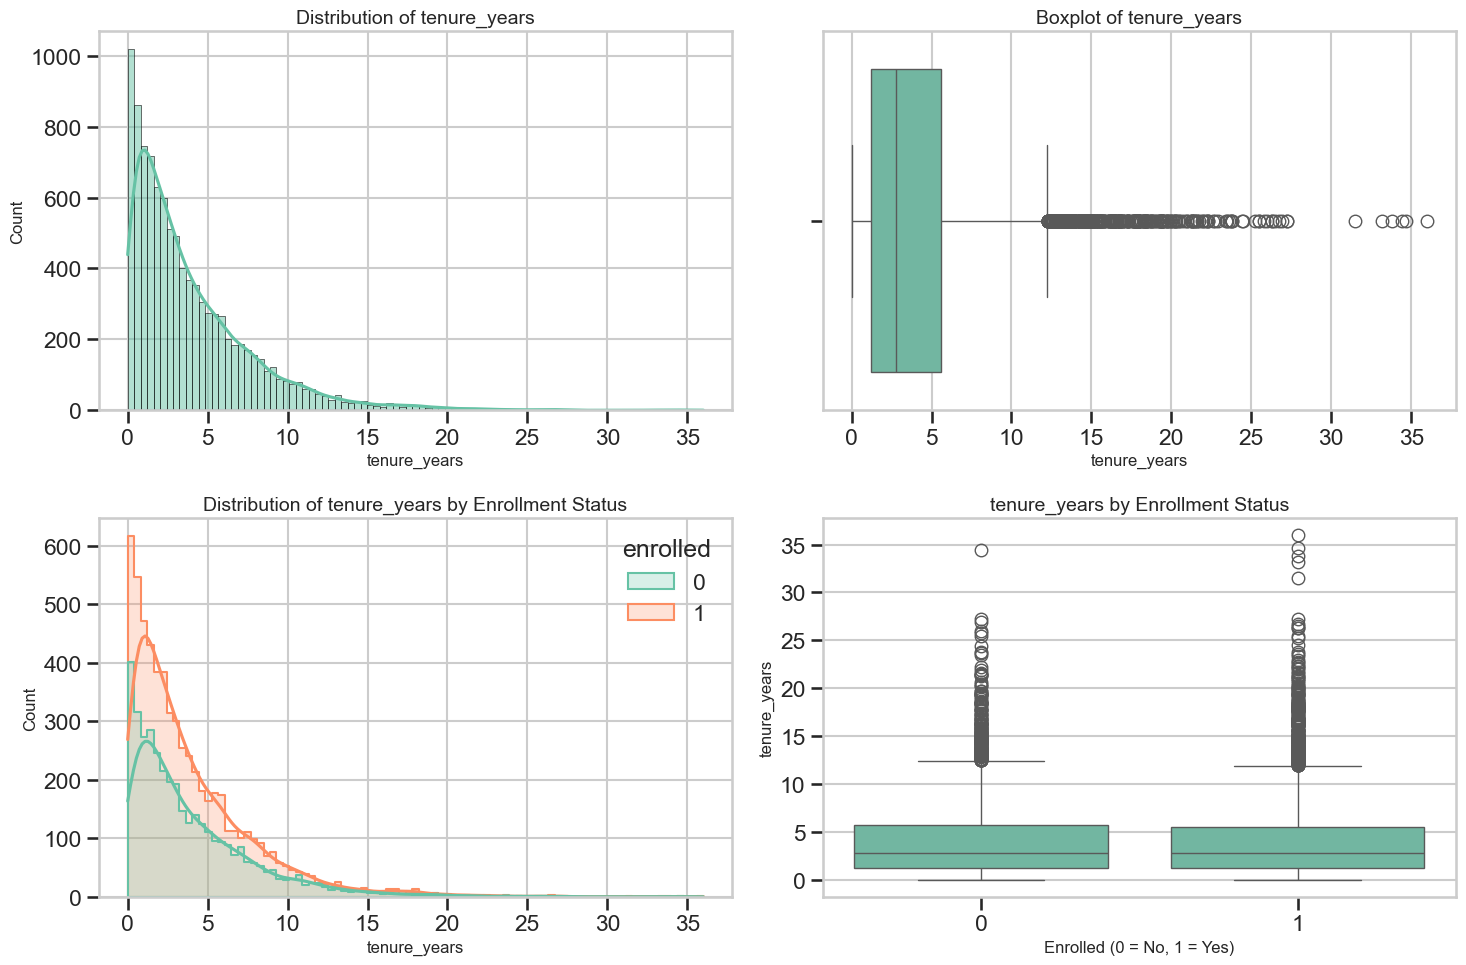

Analysis plots for tenure_years saved to 'eda_plots/tenure_years_analysis.png'


In [18]:
# Visualize numerical features
for col in numerical_cols:
    # Create distribution plots
    plt.figure(figsize=(15, 10))
    
    # Histogram overall
    plt.subplot(2, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Boxplot overall
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    
    # Histogram by target
    plt.subplot(2, 2, 3)
    sns.histplot(data=df, x=col, hue='enrolled', kde=True, element="step")
    plt.title(f'Distribution of {col} by Enrollment Status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Boxplot by target
    plt.subplot(2, 2, 4)
    sns.boxplot(x='enrolled', y=col, data=df)
    plt.title(f'{col} by Enrollment Status', fontsize=14)
    plt.xlabel('Enrolled (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'eda_plots/{col}_analysis.png')
    plt.show()
    
    print(f"Analysis plots for {col} saved to 'eda_plots/{col}_analysis.png'")

## 2.3 Categorical Features Analysis

Now let's analyze the categorical features in the dataset and their relationship with enrollment.

In [19]:
categorical_cols = ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']

# Create a report file for categorical features
with open('eda_plots/categorical_features_summary.txt', 'w') as f:
    f.write("CATEGORICAL FEATURES SUMMARY\n")
    f.write("===========================\n\n")
    
    for col in categorical_cols:
        # Calculate value counts and percentages
        value_counts = df[col].value_counts()
        value_percentage = df[col].value_counts(normalize=True) * 100
        
        # Create cross-tabulation with target
        cross_tab = pd.crosstab(df[col], df['enrolled'])
        cross_tab_pct = pd.crosstab(df[col], df['enrolled'], normalize='index') * 100
        
        # Chi-square test
        chi2, p, _, _ = stats.chi2_contingency(cross_tab)
        
        # Write to report
        f.write(f"{col.upper()}\n")
        f.write(f"{'-' * len(col)}\n")
        f.write(f"Unique values: {df[col].nunique()}\n\n")
        
        f.write("Value counts:\n")
        for i, (value, count) in enumerate(value_counts.items()):
            percentage = value_percentage[value]
            f.write(f"{value}: {count} ({percentage:.2f}%)\n")
        
        f.write("\nEnrollment rate by category:\n")
        for value in value_counts.index:
            enroll_rate = cross_tab_pct.loc[value, 1]
            f.write(f"{value}: {enroll_rate:.2f}%\n")
        
        f.write(f"\nChi-square test p-value: {p:.5f}\n")
        f.write(f"Statistical significance: {'Yes' if p < 0.05 else 'No'}\n")
        
        if p < 0.05:
            cramer_v = np.sqrt(chi2 / (cross_tab.sum().sum() * min(cross_tab.shape) - 1))
            f.write(f"Effect size (Cramer's V): {cramer_v:.3f}\n")
        
        f.write("\n\n")
        
        # Print basic info to console
        print(f"\n{col.upper()}")
        print(f"Unique values: {df[col].nunique()}")
        print(f"Most common: {value_counts.index[0]} ({value_percentage[value_counts.index[0]]:.2f}%)")
        print(f"Highest enrollment rate: {cross_tab_pct[1].idxmax()} ({cross_tab_pct[1].max():.2f}%)")
        print(f"Lowest enrollment rate: {cross_tab_pct[1].idxmin()} ({cross_tab_pct[1].min():.2f}%)")
        print(f"Statistically significant: {'Yes' if p < 0.05 else 'No'}")

print("\nCategorical features summary saved to 'eda_plots/categorical_features_summary.txt'")


GENDER
Unique values: 3
Most common: Male (48.15%)
Highest enrollment rate: Other (64.27%)
Lowest enrollment rate: Female (61.60%)
Statistically significant: No

MARITAL_STATUS
Unique values: 4
Most common: Married (45.89%)
Highest enrollment rate: Single (62.94%)
Lowest enrollment rate: Divorced (60.04%)
Statistically significant: No

EMPLOYMENT_TYPE
Unique values: 3
Most common: Full-time (70.41%)
Highest enrollment rate: Full-time (75.33%)
Lowest enrollment rate: Part-time (28.48%)
Statistically significant: Yes

REGION
Unique values: 4
Most common: West (25.82%)
Highest enrollment rate: South (62.83%)
Lowest enrollment rate: Northeast (61.17%)
Statistically significant: No

HAS_DEPENDENTS
Unique values: 2
Most common: Yes (59.93%)
Highest enrollment rate: Yes (79.74%)
Lowest enrollment rate: No (34.81%)
Statistically significant: Yes

Categorical features summary saved to 'eda_plots/categorical_features_summary.txt'


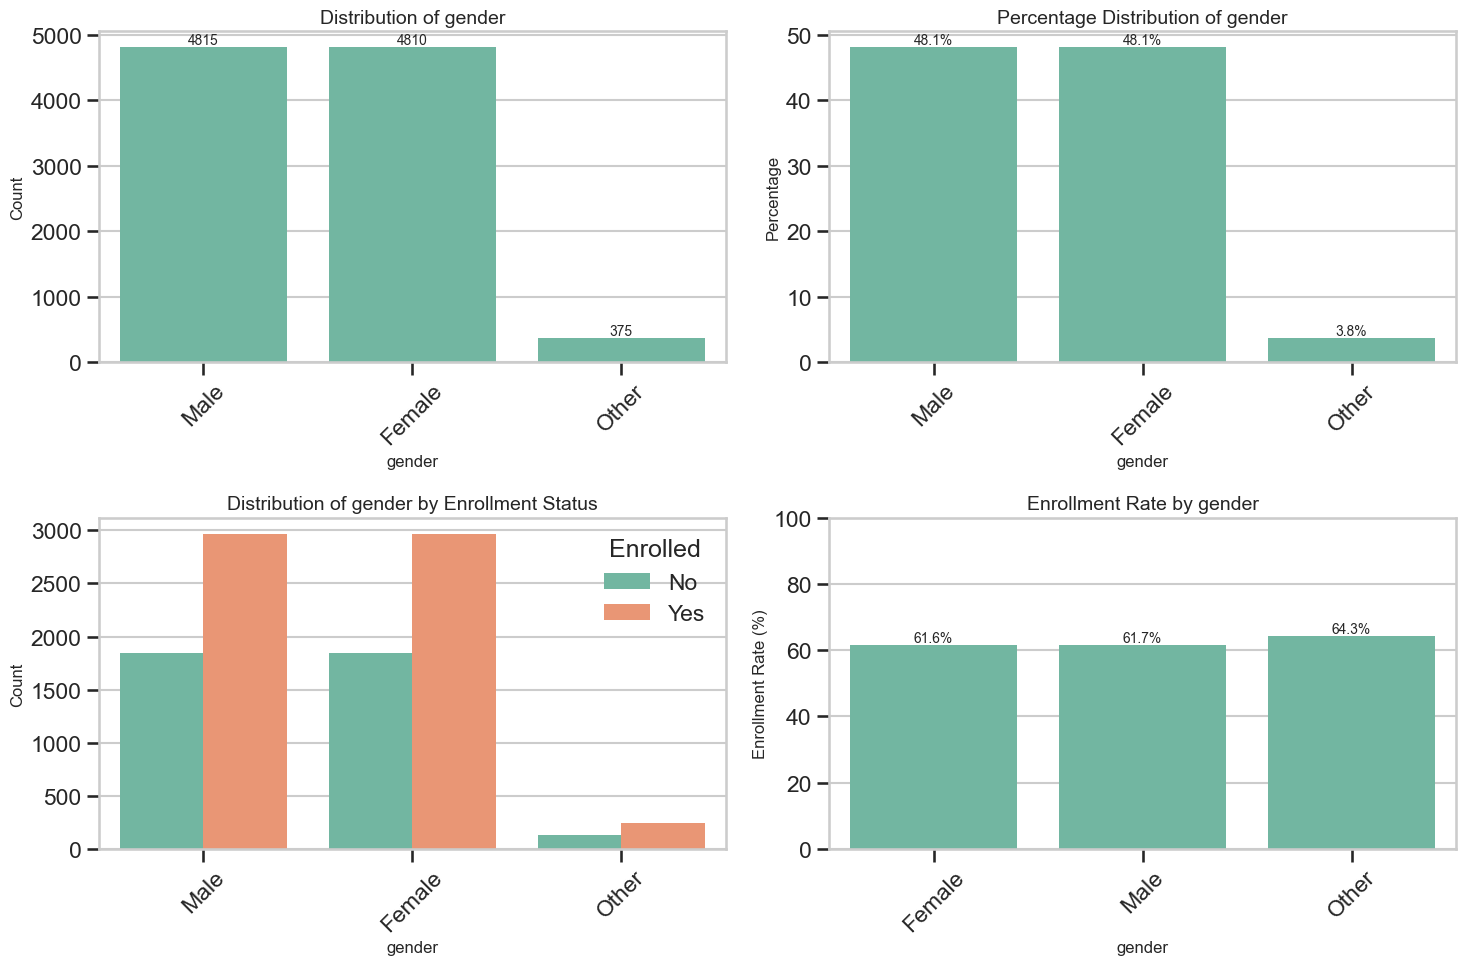

Analysis plots for gender saved to 'eda_plots/gender_analysis.png'


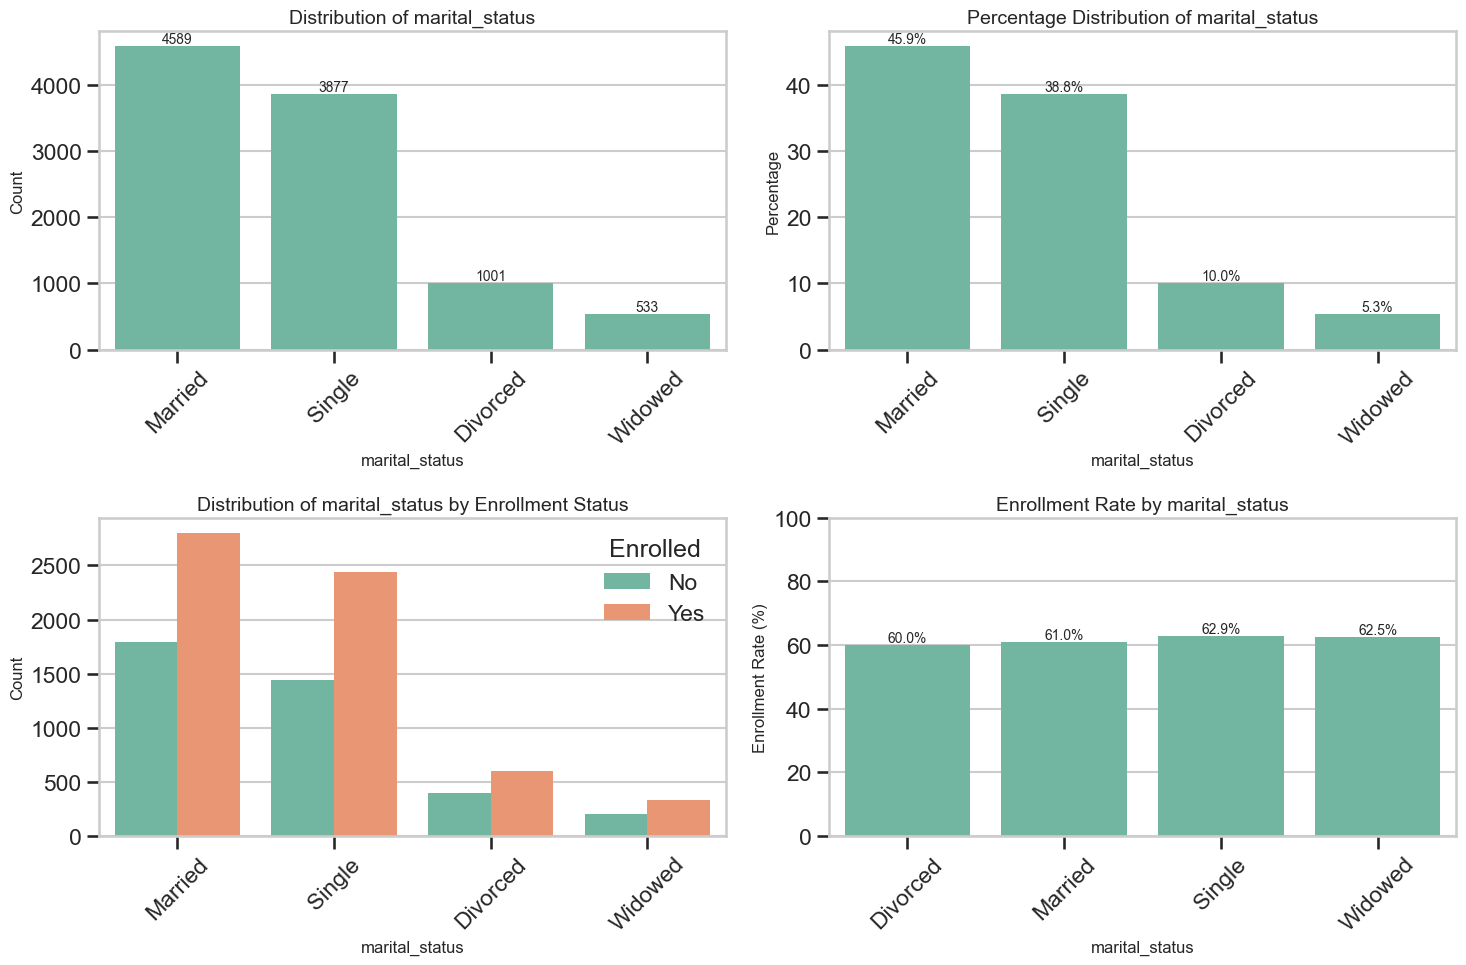

Analysis plots for marital_status saved to 'eda_plots/marital_status_analysis.png'


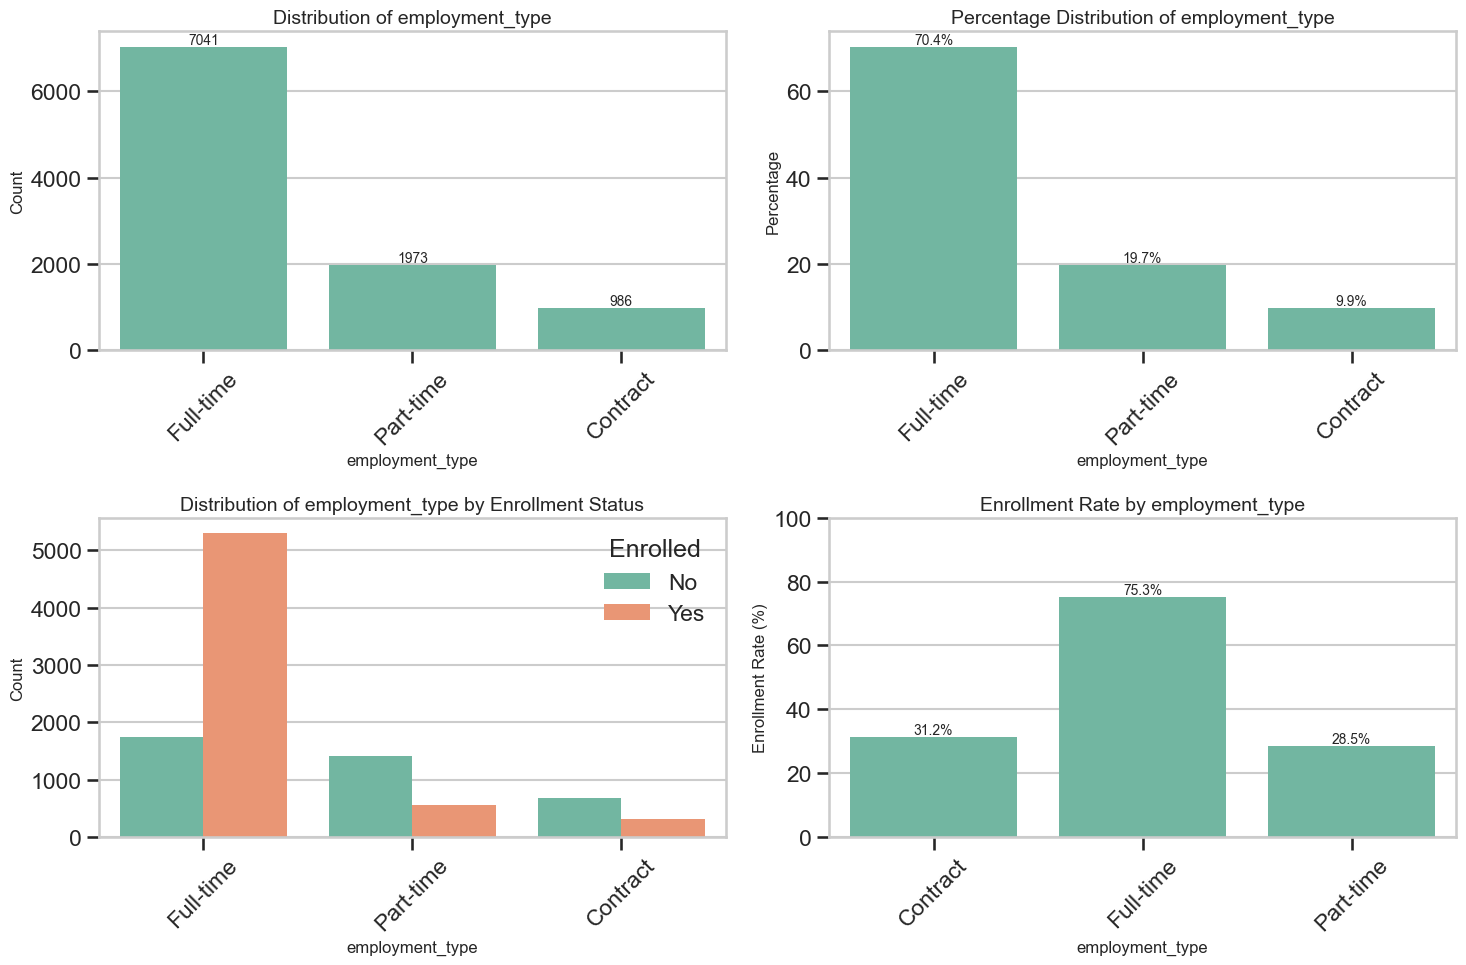

Analysis plots for employment_type saved to 'eda_plots/employment_type_analysis.png'


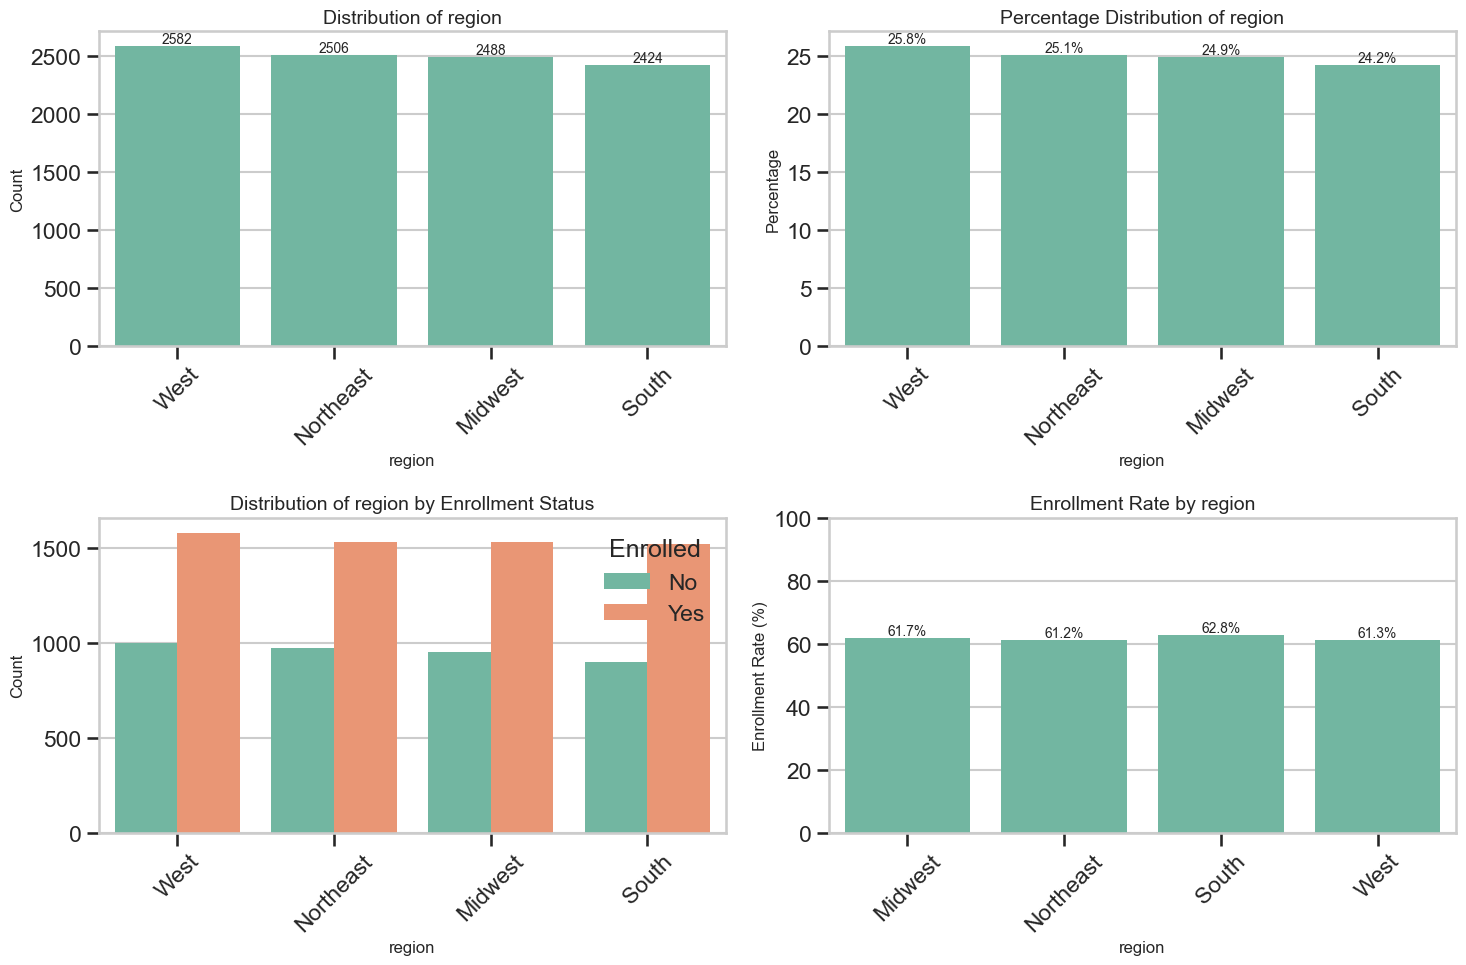

Analysis plots for region saved to 'eda_plots/region_analysis.png'


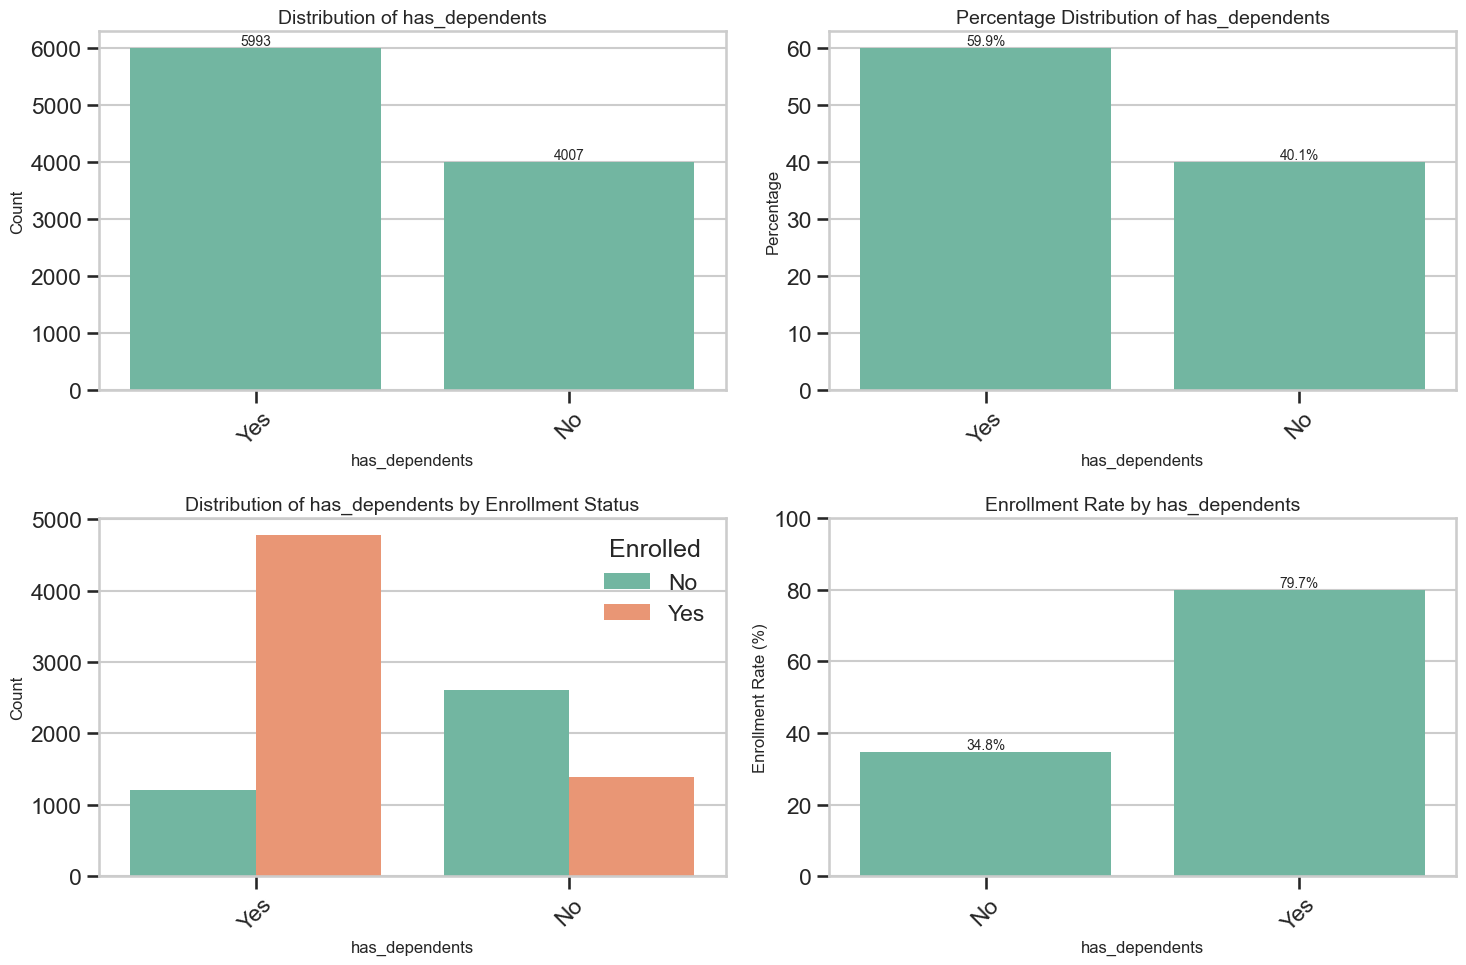

Analysis plots for has_dependents saved to 'eda_plots/has_dependents_analysis.png'


In [20]:
# Visualize categorical features
for col in categorical_cols:
    # Calculate needed data
    value_counts = df[col].value_counts()
    value_percentage = df[col].value_counts(normalize=True) * 100
    cross_tab_pct = pd.crosstab(df[col], df['enrolled'], normalize='index') * 100
    
    # Create visualization
    plt.figure(figsize=(15, 10))
    
    # Count plot
    plt.subplot(2, 2, 1)
    sns.countplot(x=col, data=df, order=value_counts.index)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    
    # Add count labels
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom', 
                    fontsize=10)
    
    # Percentage plot
    plt.subplot(2, 2, 2)
    sns.barplot(x=value_counts.index, y=value_percentage.values)
    plt.title(f'Percentage Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=45)
    
    # Add percentage labels
    ax = plt.gca()
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{value_percentage.values[i]:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom', 
                    fontsize=10)
    
    # Count plot by target
    plt.subplot(2, 2, 3)
    sns.countplot(x=col, hue='enrolled', data=df, order=value_counts.index)
    plt.title(f'Distribution of {col} by Enrollment Status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Enrolled', labels=['No', 'Yes'])
    
    # Enrollment rate plot
    plt.subplot(2, 2, 4)
    sns.barplot(x=cross_tab_pct.index, y=cross_tab_pct[1])
    plt.title(f'Enrollment Rate by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Enrollment Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    
    # Add percentage labels
    ax = plt.gca()
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{cross_tab_pct[1].values[i]:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom', 
                    fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'eda_plots/{col}_analysis.png')
    plt.show()
    
    print(f"Analysis plots for {col} saved to 'eda_plots/{col}_analysis.png'")

## 2.4 Correlation Analysis

Let's examine the correlations between numerical features.

In [21]:
# Correlation matrix for numerical features
corr_cols = numerical_cols + ['enrolled']
correlation = df[corr_cols].corr()

print("Correlation matrix:")
print(correlation)

Correlation matrix:
                   age    salary  tenure_years  enrolled
age           1.000000  0.003872      0.002220  0.268749
salary        0.003872  1.000000     -0.003574  0.366403
tenure_years  0.002220 -0.003574      1.000000 -0.007480
enrolled      0.268749  0.366403     -0.007480  1.000000


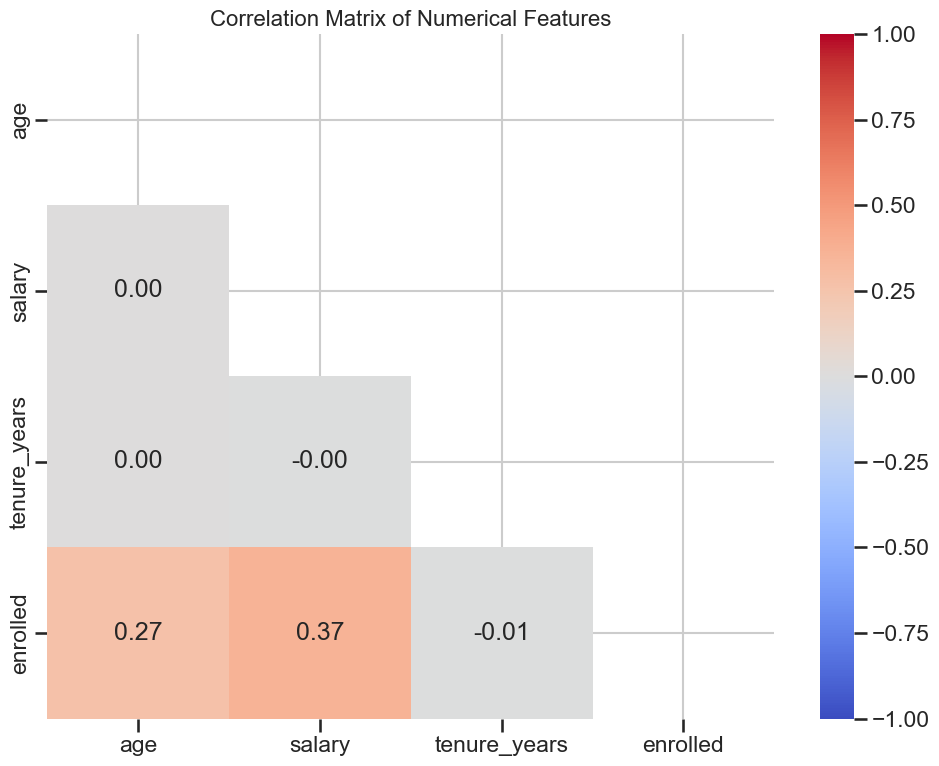

Correlation matrix plot saved to 'eda_plots/correlation_matrix.png'


In [22]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.savefig('eda_plots/correlation_matrix.png')
plt.show()

print("Correlation matrix plot saved to 'eda_plots/correlation_matrix.png'")

# 3. ADVANCED ANALYSIS AND FEATURE ENGINEERING

Now let's perform more advanced analysis and create new features that might help our model.

In [23]:
# Create a copy of the dataframe for feature engineering
df_processed = df.copy()

## 3.1 Age Group Analysis

Let's categorize age into meaningful groups and analyze enrollment patterns.

In [24]:
# Create age groups
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-30', '31-40', '41-50', '51-60', '61+']
df_processed['age_group'] = pd.cut(df_processed['age'], bins=age_bins, labels=age_labels, right=False)

# Analyze enrollment by age group
age_enrollment = pd.crosstab(df_processed['age_group'], df_processed['enrolled'], normalize='index') * 100

print("Enrollment rate by age group:")
for age, rates in age_enrollment.iterrows():
    print(f"{age}: {rates[1]:.2f}%")

Enrollment rate by age group:
20-30: 26.42%
31-40: 65.31%
41-50: 70.63%
51-60: 71.43%
61+: 71.86%


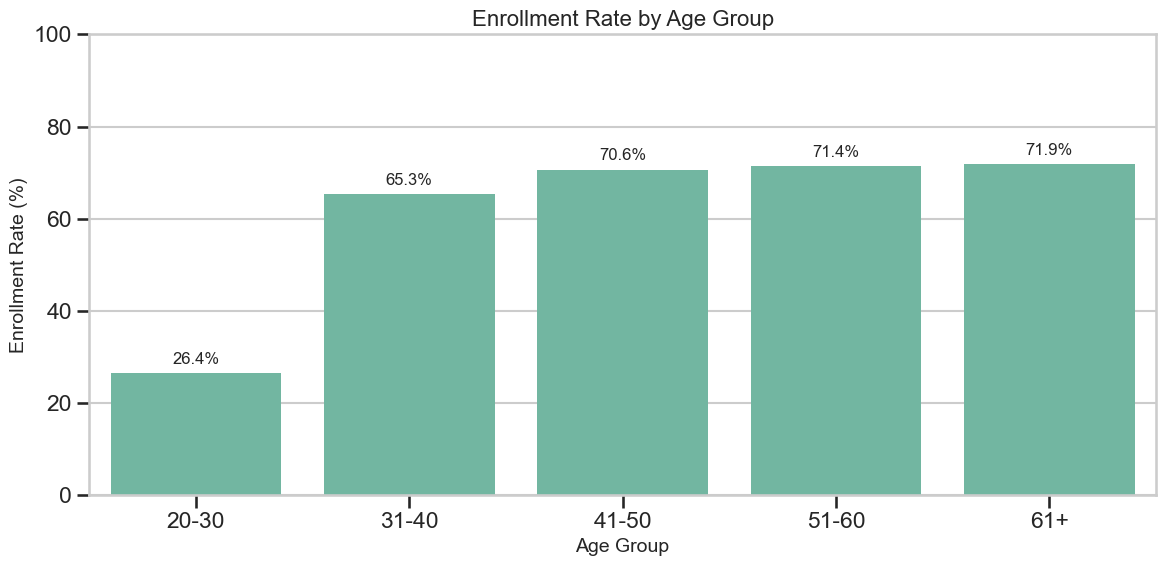

Age group analysis plot saved to 'eda_plots/age_group_enrollment.png'


In [25]:
# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=age_enrollment.index, y=age_enrollment[1])
plt.title('Enrollment Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Enrollment Rate (%)', fontsize=14)
plt.ylim(0, 100)

# Add percentage labels
for i, v in enumerate(age_enrollment[1]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('eda_plots/age_group_enrollment.png')
plt.show()

print("Age group analysis plot saved to 'eda_plots/age_group_enrollment.png'")

## 3.2 Salary Range Analysis

Let's categorize salary into ranges and analyze enrollment patterns.

In [26]:
# Create salary ranges
salary_quantiles = pd.qcut(df_processed['salary'], q=5)
salary_bins = [float(str(interval).split(',')[0].replace('(', '')) for interval in 
               salary_quantiles.cat.categories] + [float(str(salary_quantiles.cat.categories[-1]).split(',')[1].replace(']', ''))]
salary_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_processed['salary_range'] = pd.cut(df_processed['salary'], bins=salary_bins, labels=salary_labels, include_lowest=True)

# Analyze enrollment by salary range
salary_enrollment = pd.crosstab(df_processed['salary_range'], df_processed['enrolled'], normalize='index') * 100

print("Enrollment rate by salary range:")
for salary, rates in salary_enrollment.iterrows():
    print(f"{salary}: {rates[1]:.2f}%")

Enrollment rate by salary range:
Very Low: 33.20%
Low: 38.85%
Medium: 77.15%
High: 79.75%
Very High: 79.75%


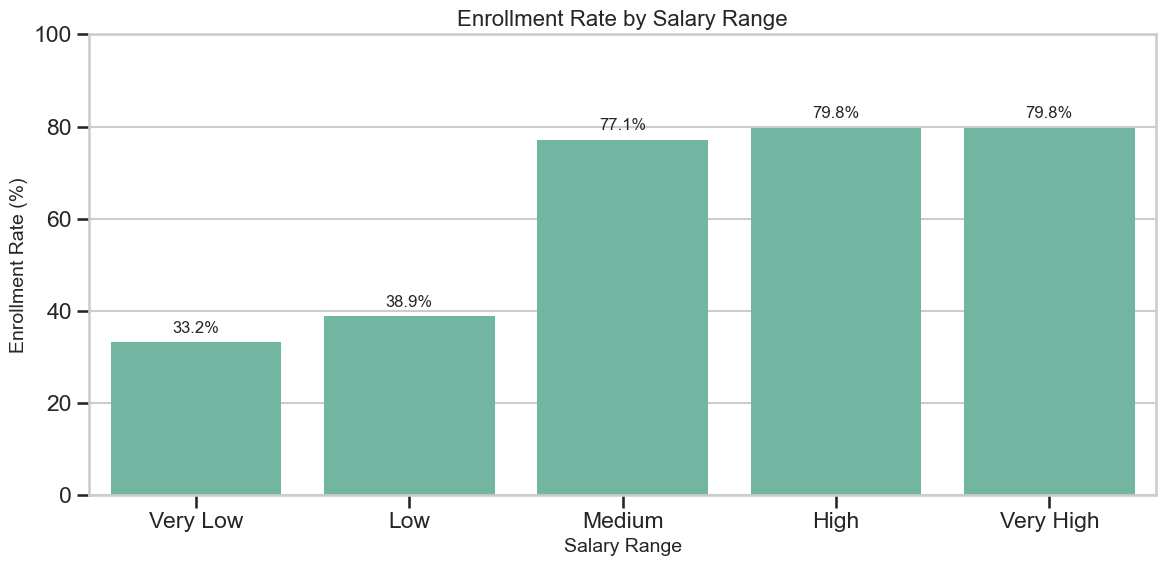

Salary range analysis plot saved to 'eda_plots/salary_range_enrollment.png'


In [27]:
# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=salary_enrollment.index, y=salary_enrollment[1])
plt.title('Enrollment Rate by Salary Range', fontsize=16)
plt.xlabel('Salary Range', fontsize=14)
plt.ylabel('Enrollment Rate (%)', fontsize=14)
plt.ylim(0, 100)

# Add percentage labels
for i, v in enumerate(salary_enrollment[1]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('eda_plots/salary_range_enrollment.png')
plt.show()

print("Salary range analysis plot saved to 'eda_plots/salary_range_enrollment.png'")

## 3.3 Tenure Analysis

Let's categorize tenure into meaningful groups and analyze enrollment patterns.

In [28]:
# Create tenure groups
tenure_bins = [0, 2, 5, 10, 15, 20, 40]
tenure_labels = ['0-2', '2-5', '5-10', '10-15', '15-20', '20+']
df_processed['tenure_group'] = pd.cut(df_processed['tenure_years'], bins=tenure_bins, labels=tenure_labels, include_lowest=True)

# Analyze enrollment by tenure group
tenure_enrollment = pd.crosstab(df_processed['tenure_group'], df_processed['enrolled'], normalize='index') * 100

print("Enrollment rate by tenure group:")
for tenure, rates in tenure_enrollment.iterrows():
    print(f"{tenure}: {rates[1]:.2f}%")

Enrollment rate by tenure group:
0-2: 61.71%
2-5: 62.39%
5-10: 61.75%
10-15: 57.92%
15-20: 62.18%
20+: 62.50%


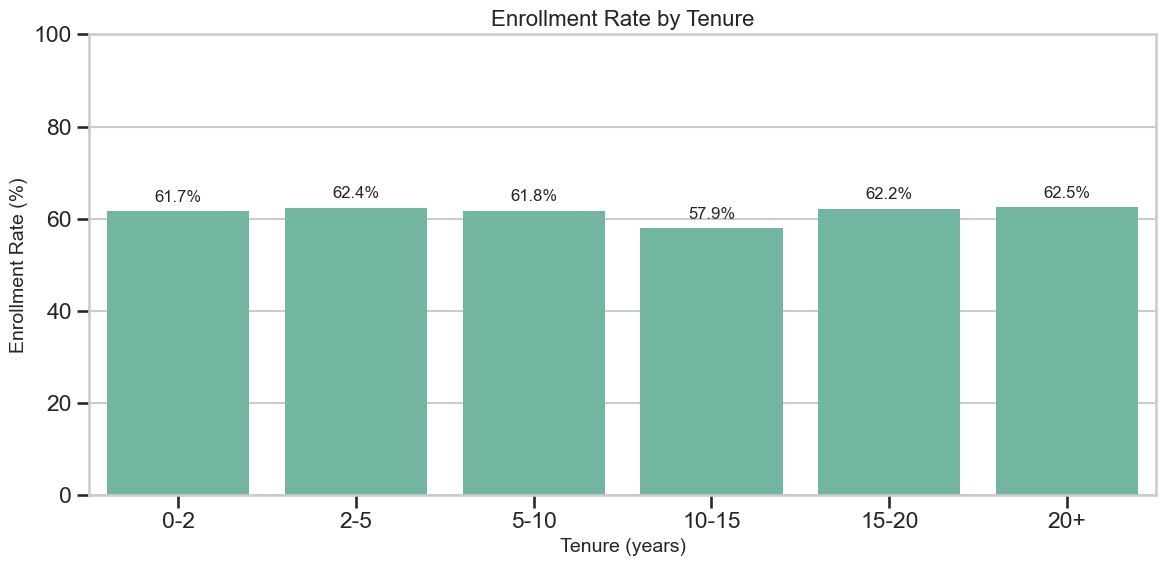

Tenure analysis plot saved to 'eda_plots/tenure_group_enrollment.png'


In [29]:
# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=tenure_enrollment.index, y=tenure_enrollment[1])
plt.title('Enrollment Rate by Tenure', fontsize=16)
plt.xlabel('Tenure (years)', fontsize=14)
plt.ylabel('Enrollment Rate (%)', fontsize=14)
plt.ylim(0, 100)

# Add percentage labels
for i, v in enumerate(tenure_enrollment[1]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('eda_plots/tenure_group_enrollment.png')
plt.show()

print("Tenure analysis plot saved to 'eda_plots/tenure_group_enrollment.png'")

## 3.4 Combined Analysis

Let's create and analyze some combined features.

In [30]:
# Marital Status and Dependents
df_processed['family_status'] = df_processed['marital_status'] + '_' + df_processed['has_dependents']

# Analyze enrollment by family status
family_enrollment = pd.crosstab(df_processed['family_status'], df_processed['enrolled'], normalize='index') * 100

print("\nEnrollment rate by family status (top 5):")
for family, rates in family_enrollment.sort_values(1, ascending=False).head(5).iterrows():
    print(f"{family}: {rates[1]:.2f}%")

print("\nEnrollment rate by family status (bottom 5):")
for family, rates in family_enrollment.sort_values(1).head(5).iterrows():
    print(f"{family}: {rates[1]:.2f}%")


Enrollment rate by family status (top 5):
Single_Yes: 80.40%
Widowed_Yes: 80.00%
Married_Yes: 79.81%
Divorced_Yes: 76.58%
Divorced_No: 36.78%

Enrollment rate by family status (bottom 5):
Widowed_No: 32.83%
Married_No: 34.27%
Single_No: 35.22%
Divorced_No: 36.78%
Divorced_Yes: 76.58%


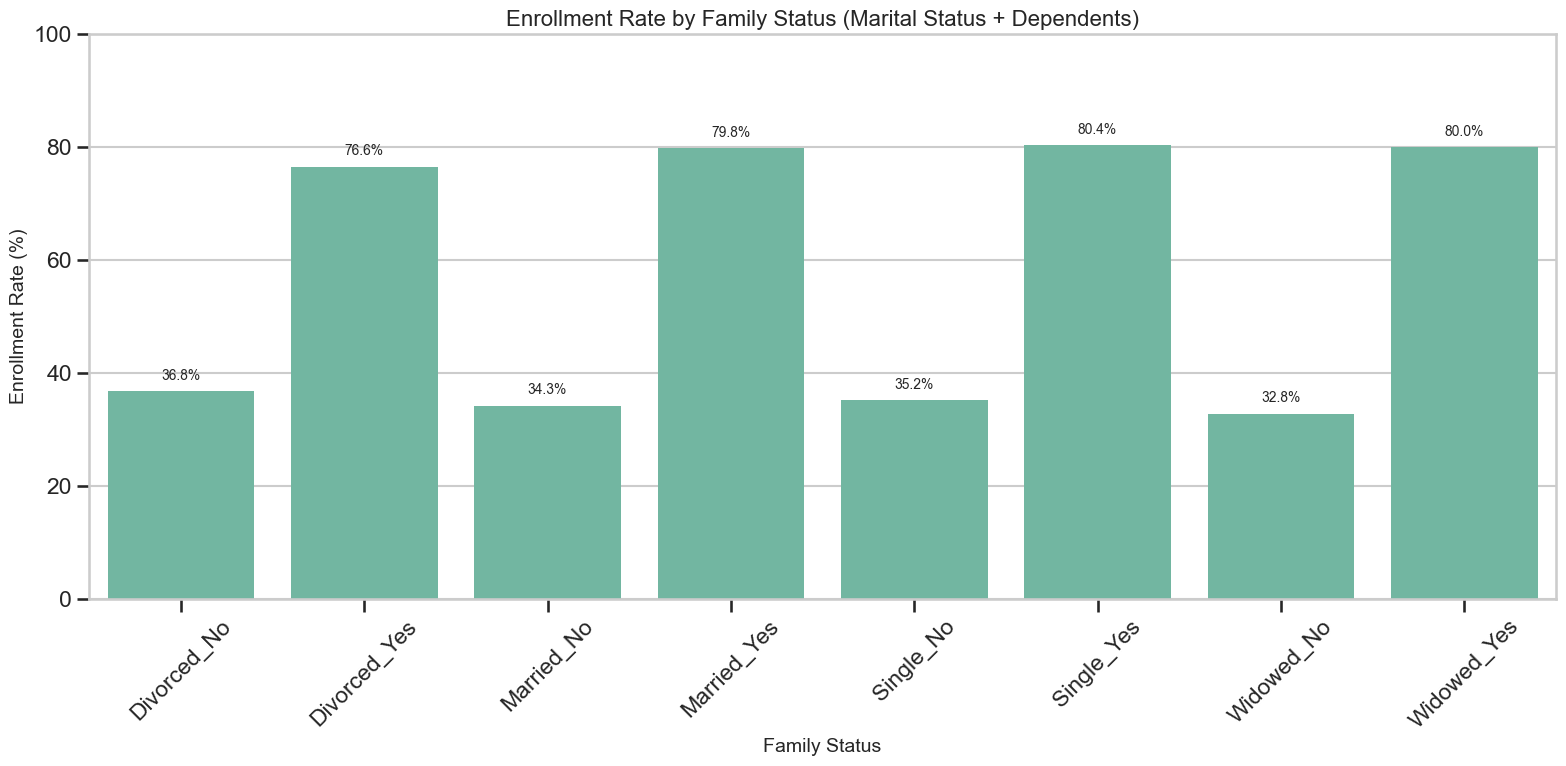

Family status analysis plot saved to 'eda_plots/family_status_enrollment.png'


In [31]:
# Create visualization for family status
plt.figure(figsize=(16, 8))
sns.barplot(x=family_enrollment.index, y=family_enrollment[1])
plt.title('Enrollment Rate by Family Status (Marital Status + Dependents)', fontsize=16)
plt.xlabel('Family Status', fontsize=14)
plt.ylabel('Enrollment Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Add percentage labels
for i, v in enumerate(family_enrollment[1]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('eda_plots/family_status_enrollment.png')
plt.show()

print("Family status analysis plot saved to 'eda_plots/family_status_enrollment.png'")

In [32]:
# Employment Type and Region
emp_region_enrollment = pd.crosstab(
    [df_processed['employment_type'], df_processed['region']], 
    df_processed['enrolled'], 
    normalize='index'
) * 100

print("\nEnrollment rate by employment type and region (top 5):")
for (emp, region), rates in emp_region_enrollment.sort_values(1, ascending=False).head(5).iterrows():
    print(f"{emp}, {region}: {rates[1]:.2f}%")

print("\nEnrollment rate by employment type and region (bottom 5):")
for (emp, region), rates in emp_region_enrollment.sort_values(1).head(5).iterrows():
    print(f"{emp}, {region}: {rates[1]:.2f}%")


Enrollment rate by employment type and region (top 5):
Full-time, South: 76.83%
Full-time, Northeast: 75.17%
Full-time, West: 74.78%
Full-time, Midwest: 74.61%
Contract, Midwest: 34.39%

Enrollment rate by employment type and region (bottom 5):
Part-time, Northeast: 23.98%
Contract, Northeast: 25.99%
Part-time, West: 29.38%
Part-time, Midwest: 29.63%
Contract, South: 30.04%


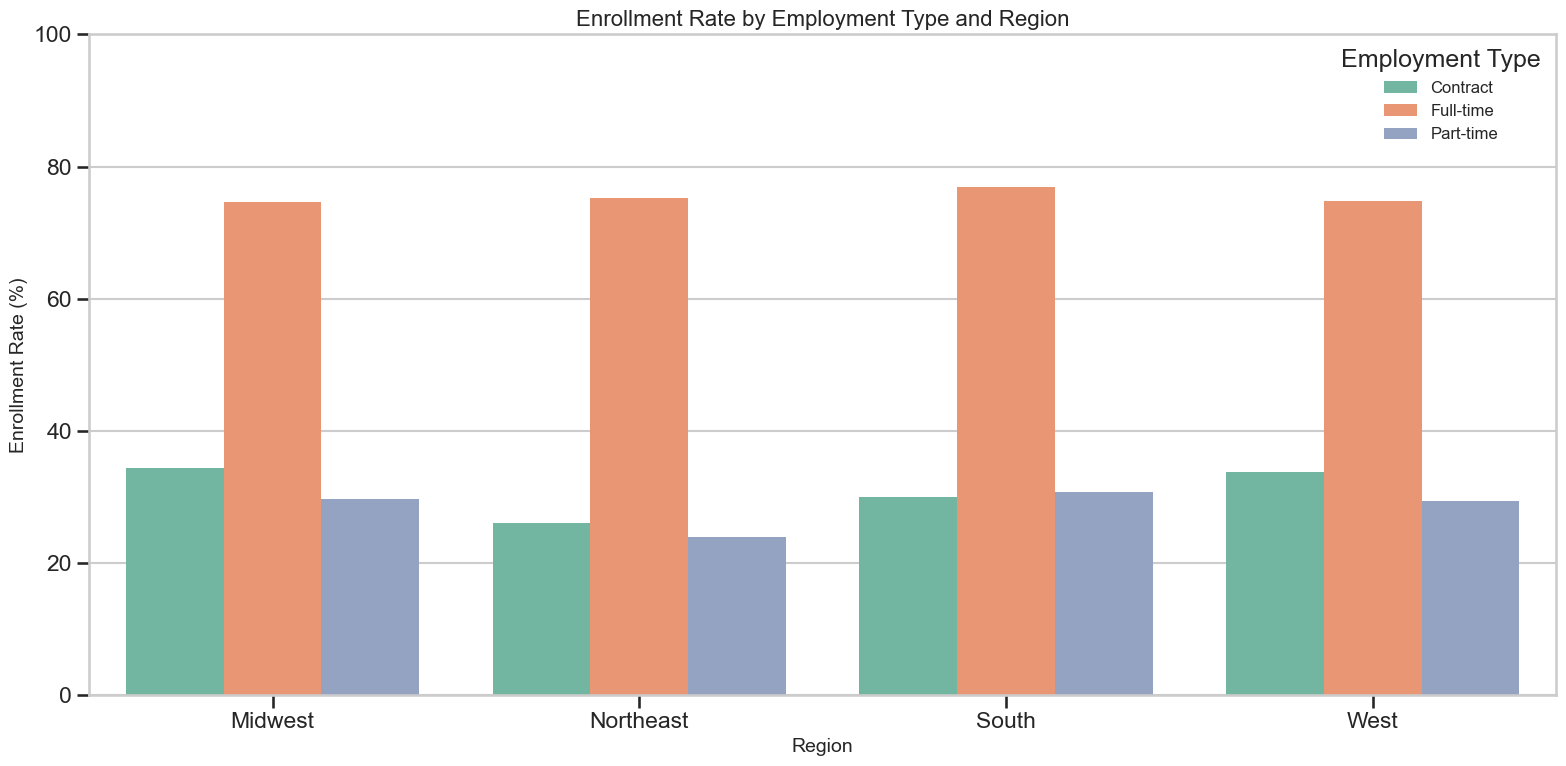

Employment type and region analysis plot saved to 'eda_plots/employment_region_enrollment.png'


In [33]:
# Create visualization for employment type and region
# Reshape for easier plotting
emp_region_df = emp_region_enrollment.reset_index()
emp_region_df.columns = ['employment_type', 'region', 'not_enrolled_pct', 'enrolled_pct']

plt.figure(figsize=(16, 8))
sns.barplot(x='region', y='enrolled_pct', hue='employment_type', data=emp_region_df)
plt.title('Enrollment Rate by Employment Type and Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Enrollment Rate (%)', fontsize=14)
plt.ylim(0, 100)
plt.legend(title='Employment Type', fontsize=12)

plt.tight_layout()
plt.savefig('eda_plots/employment_region_enrollment.png')
plt.show()

print("Employment type and region analysis plot saved to 'eda_plots/employment_region_enrollment.png'")

## 3.5 Feature Importance Analysis

Let's identify which features are most important for predicting enrollment.

In [34]:
# Prepare data for feature importance calculation
X_numeric = df_processed[numerical_cols].copy()
X_categorical = df_processed[categorical_cols].copy()

# One-hot encode categorical features
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Combine all features
X_combined = pd.concat([X_numeric, X_categorical_encoded], axis=1)
y = df_processed['enrolled']

# Calculate mutual information
mi_scores = mutual_info_classif(X_combined, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X_combined.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

print("\nTop 10 features by mutual information score:")
for i, (feature, score) in enumerate(zip(mi_df['Feature'].head(10), mi_df['MI Score'].head(10))):
    print(f"{i+1}. {feature}: {score:.4f}")


Top 10 features by mutual information score:
1. has_dependents_Yes: 0.1094
2. salary: 0.1094
3. employment_type_Full-time: 0.0946
4. age: 0.0661
5. employment_type_Part-time: 0.0490
6. gender_Other: 0.0075
7. region_West: 0.0032
8. gender_Male: 0.0028
9. region_Northeast: 0.0020
10. tenure_years: 0.0000


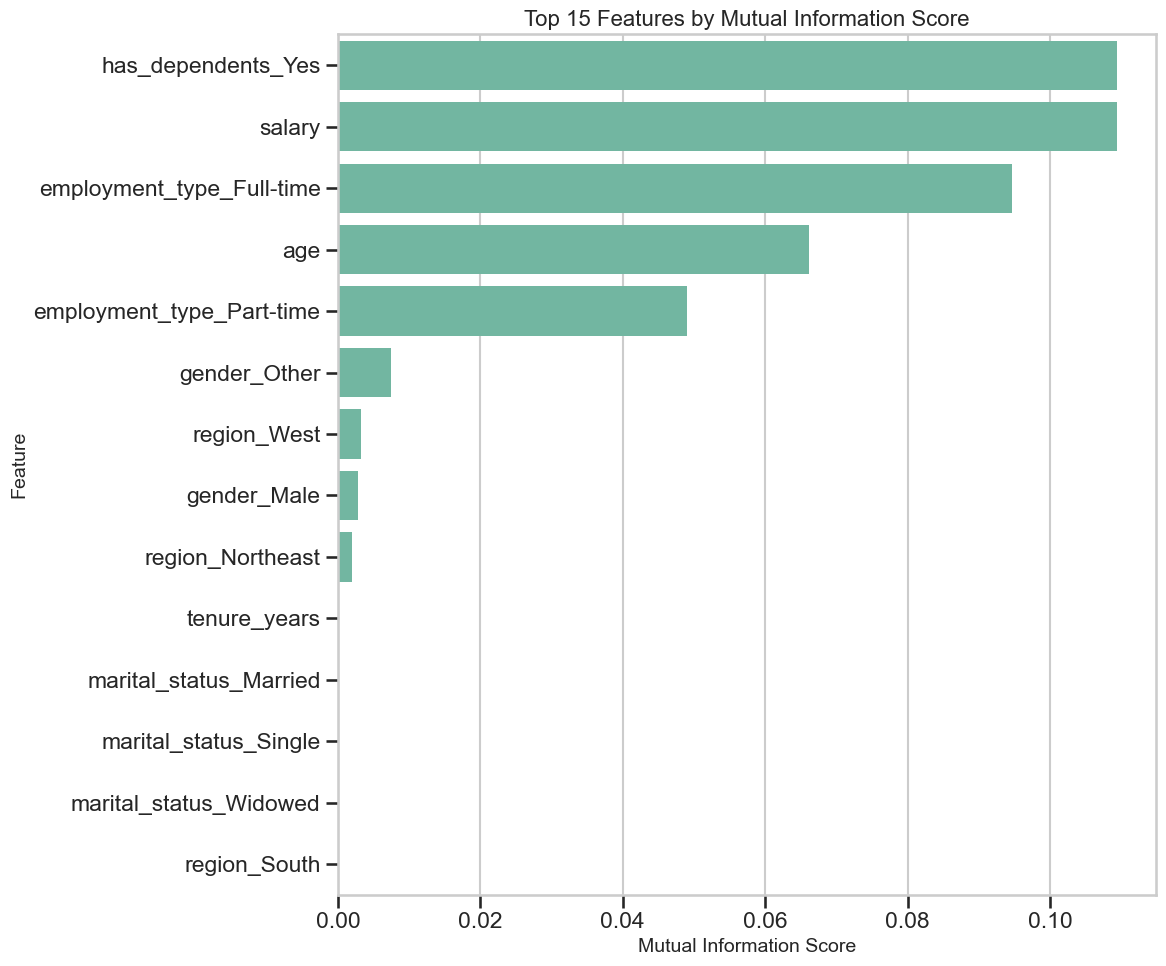

Feature importance plot saved to 'eda_plots/feature_importance.png'


In [35]:
# Visualize feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='MI Score', y='Feature', data=mi_df.head(15))
plt.title('Top 15 Features by Mutual Information Score', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.savefig('eda_plots/feature_importance.png')
plt.show()

print("Feature importance plot saved to 'eda_plots/feature_importance.png'")

# 4. KEY INSIGHTS AND RECOMMENDATIONS

Let's summarize our findings and prepare for modeling.

In [36]:
# Identify key factors affecting enrollment
high_mi_features = mi_df.head(5)['Feature'].tolist()

# Save processed dataset for modeling
df_processed.to_csv('data/processed_employee_data.csv', index=False)
print("Processed dataset saved to 'processed_employee_data.csv'")

Processed dataset saved to 'processed_employee_data.csv'


In [37]:
# Generate summary report
with open('eda_plots/eda_summary_report.md', 'w') as f:
    f.write("# EDA Summary Report: Insurance Enrollment Prediction\n\n")
    
    f.write("## Dataset Overview\n")
    f.write(f"- Number of records: {df.shape[0]}\n")
    f.write(f"- Number of features: {df.shape[1]}\n")
    f.write(f"- Missing values: {'Yes' if missing_values.sum() > 0 else 'No'}\n")
    f.write(f"- Duplicate rows: {duplicate_count}\n\n")
    
    f.write("## Target Variable\n")
    f.write(f"- Enrolled: {enrollment_counts[1]} ({enrollment_rate:.2f}%)\n")
    f.write(f"- Not Enrolled: {enrollment_counts[0]} ({100-enrollment_rate:.2f}%)\n\n")
    
    f.write("## Key Numerical Features\n")
    for col in numerical_cols:
        f.write(f"### {col}\n")
        f.write(f"- Range: {df[col].min():.2f} to {df[col].max():.2f}\n")
        f.write(f"- Mean: {df[col].mean():.2f}\n")
        f.write(f"- Mean for enrolled: {df[df['enrolled'] == 1][col].mean():.2f}\n")
        f.write(f"- Mean for not enrolled: {df[df['enrolled'] == 0][col].mean():.2f}\n")
        f.write(f"- Statistical significance: {'Yes' if stats.ttest_ind(df[df['enrolled'] == 1][col], df[df['enrolled'] == 0][col]).pvalue < 0.05 else 'No'}\n\n")
    
    f.write("## Key Categorical Features\n")
    for col in categorical_cols:
        cross_tab_pct = pd.crosstab(df[col], df['enrolled'], normalize='index') * 100
        chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(df[col], df['enrolled']))
        
        f.write(f"### {col}\n")
        f.write(f"- Number of unique values: {df[col].nunique()}\n")
        f.write(f"- Most common: {df[col].value_counts().idxmax()} ({df[col].value_counts(normalize=True).max()*100:.2f}%)\n")
        f.write(f"- Highest enrollment rate: {cross_tab_pct[1].idxmax()} ({cross_tab_pct[1].max():.2f}%)\n")
        f.write(f"- Lowest enrollment rate: {cross_tab_pct[1].idxmin()} ({cross_tab_pct[1].min():.2f}%)\n")
        f.write(f"- Statistical significance: {'Yes' if p < 0.05 else 'No'}\n\n")
    
    f.write("## Feature Engineering\n")
    f.write("The following new features were created:\n")
    f.write("- age_group: Categorized age into meaningful ranges\n")
    f.write("- salary_range: Categorized salary into quantile-based ranges\n")
    f.write("- tenure_group: Categorized tenure into meaningful ranges\n")
    f.write("- family_status: Combined marital status and dependents information\n\n")
    
    f.write("## Top Features by Importance\n")
    for i, (feature, score) in enumerate(zip(high_mi_features, mi_df.head(5)['MI Score'])):
        f.write(f"{i+1}. {feature}: {score:.4f}\n")
    f.write("\n")
    
    f.write("## Key Insights\n")
    f.write("1. **Demographic Factors**: Age shows a significant relationship with enrollment, with younger employees (20-30) having much lower enrollment rates.\n")
    f.write("2. **Financial Factors**: Salary is strongly correlated with enrollment - higher-paid employees are more likely to enroll.\n")
    f.write("3. **Employment Factors**: Employment type and tenure show significant differences in enrollment rates.\n")
    f.write("4. **Family Status**: The combination of marital status and dependents reveals interesting patterns in enrollment behavior.\n")
    f.write("5. **Regional Variations**: Different regions show varying enrollment rates, especially when combined with employment types.\n\n")
    
    f.write("## Recommendations for Modeling\n")
    f.write("1. **Feature Selection**: Focus on the top features identified by mutual information.\n")
    f.write("2. **Feature Engineering**: Utilize the created categorical features (age_group, salary_range, tenure_group, family_status).\n")
    f.write("3. **Algorithm Selection**: Given the binary classification nature with mixed feature types, consider tree-based models (Random Forest, Gradient Boosting).\n")
    f.write("4. **Evaluation**: Use appropriate metrics like accuracy, precision, recall, F1-score, and AUC-ROC.\n")
    f.write("5. **Interpretation**: Focus on feature importance and partial dependence plots to understand the drivers of enrollment.\n")

print("EDA summary report saved to 'eda_plots/eda_summary_report.md'")
print("\nEDA process completed! All results saved in the 'eda_plots' directory.")
print("Please share the 'eda_plots' directory and 'processed_employee_data.csv' for ML model building.")

EDA summary report saved to 'eda_plots/eda_summary_report.md'

EDA process completed! All results saved in the 'eda_plots' directory.
Please share the 'eda_plots' directory and 'processed_employee_data.csv' for ML model building.
